In [1]:
!pip install wordcloud

In [2]:
!pip install mlxtend

In [3]:
import pandas as pd

In [23]:
data=pd.read_csv('C:/Users\YA MAALIKUL MULK/Downloads/GroceryStoreDataSet.csv',header=None,names=['itemsets'])

<>:1: DeprecationWarning: invalid escape sequence \Y
<>:1: DeprecationWarning: invalid escape sequence \Y
C:\Users\YA MAALIKUL MULK\AppData\Local\Temp\ipykernel_14248\1409157965.py:1: DeprecationWarning: invalid escape sequence \Y
  data=pd.read_csv('C:/Users\YA MAALIKUL MULK/Downloads/GroceryStoreDataSet.csv',header=None,names=['itemsets'])


In [24]:
df=data

In [25]:
df
df.head()

,itemsets
0,product
1,"MILK,BREAD,BISCUIT"
2,"BREAD,MILK,BISCUIT,CORNFLAKES"
3,"BREAD,TEA,BOURNVITA"
4,"JAM,MAGGI,BREAD,MILK"


In [26]:
df.shape

(21, 1)

In [27]:
df.columns

Index(['itemsets'], dtype='object')

In [28]:
df.values

array([['product'],
       ['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COCK'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [29]:
df = list(df["grocery"].apply(lambda x:x.split(',')))
df


KeyError: 'grocery'

In [30]:
from mlxtend.preprocessing import TransactionEncoder


In [31]:
te = TransactionEncoder()
te_df = te.fit(df).transform(df)
df1 = pd.DataFrame(te_df,columns=te.columns_)
df1


,e,i,m,s,t
0,True,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [32]:
from mlxtend.frequent_patterns import apriori


In [33]:
df2 = apriori(df1,min_support=0.01,use_colnames=True)
df2


,support,itemsets
0,0.047619,(e)
1,0.047619,(i)
2,0.047619,(m)
3,0.047619,(s)
4,0.047619,(t)
5,0.047619,"(e, i)"
6,0.047619,"(m, e)"
7,0.047619,"(e, s)"
8,0.047619,"(t, e)"
9,0.047619,"(m, i)"


In [34]:
df2.sort_values(by="support",ascending=False)


,support,itemsets
0,0.047619,(e)
16,0.047619,"(s, e, i)"
29,0.047619,"(s, m, i, t)"
28,0.047619,"(t, m, e, s)"
27,0.047619,"(s, e, i, t)"
26,0.047619,"(t, m, e, i)"
25,0.047619,"(s, m, e, i)"
24,0.047619,"(t, m, s)"
23,0.047619,"(s, i, t)"
22,0.047619,"(t, m, i)"


In [35]:
df2['length'] = df2['itemsets'].apply(lambda x:len(x))
df2

,support,itemsets,length
0,0.047619,(e),1
1,0.047619,(i),1
2,0.047619,(m),1
3,0.047619,(s),1
4,0.047619,(t),1
5,0.047619,"(e, i)",2
6,0.047619,"(m, e)",2
7,0.047619,"(e, s)",2
8,0.047619,"(t, e)",2
9,0.047619,"(m, i)",2


In [36]:
df2[(df2['length']==2) & (df2['support']>=0.05)]


,support,itemsets,length


In [37]:
df2.ascending = False
df2



,support,itemsets,length
0,0.047619,(e),1
1,0.047619,(i),1
2,0.047619,(m),1
3,0.047619,(s),1
4,0.047619,(t),1
5,0.047619,"(e, i)",2
6,0.047619,"(m, e)",2
7,0.047619,"(e, s)",2
8,0.047619,"(t, e)",2
9,0.047619,"(m, i)",2


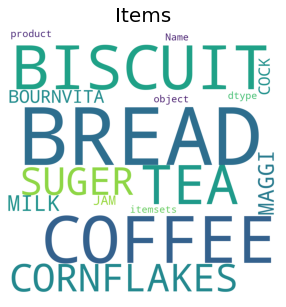

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (12, 5)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df['itemsets']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()